<a href="https://colab.research.google.com/github/JulianDamelamia/equidad_2c25/blob/main/TP_final_equidad.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Equidad en Aprendizaje Automático**: Trabajo práctico
2do cuatrimestre 2025

**Docente:** Mariela Rajngewerc

**Alumnos:**

*   Fraga, Julián
*   Miraglia, Morena
*   Oliaro, Lucas



---









# Preparación del dataset

In [ ]:
!pip install holisticai

In [ ]:
#Importamos bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import matplotlib.pyplot as plt
from holisticai.bias.metrics import classification_bias_metrics
from holisticai.datasets import Dataset, load_dataset
from holisticai.pipeline import Pipeline
from holisticai.datasets.plots import correlation_matrix_plot
from holisticai.bias.mitigation import Reweighing


In [ ]:
def transform_df(df_):
    df = df_.copy()
    # status mapping dict
    status_dict = {"A11": "<0 DM", "A12": "0<= \n<200 DM", "A13": ">= 200 DM", "A14": "no checking\n account"}
    df['Status'] = df['Status'].map(status_dict)

    # credit_history mapping dict
    credit_history_dict = {
        "A30": "no credits\n taken",
        "A31": "all credits\n paid",
        "A32": "existing\n credits paid",
        "A33": "delay in \npaying off\n in the past",
        "A34": "critcal account"
    }
    df["Credit History"] = df["Credit History"].map(credit_history_dict)

    # column Purpose mapping dict
    purpose_dict = {
        "A40" : "car (new)",
        "A41" : "car (used)",
        "A42" : "furniture/\nequipment",
        "A43" : "radio/\ntelevision",
        "A44" : "domestic\n appliances",
        "A45" : "repairs",
        "A46" : "education",
        "A47" : "vacation \ndon't exist",
        "A48" : "retraining",
        "A49" : "business",
        "A410" : "others"
    }
    df["Purpose"] = df["Purpose"].map(purpose_dict)

    # column Savings account/bonds maping dict
    saving_account_dict = {
        "A61" :   "<  100 DM",
        "A62" :   "100 <= \n& <  500 DM",
        "A63" :   "500 <= \n& < 1000 DM",
        "A64" :   ">= 1000 DM",
        "A65" :   "no savings\n account"
    }
    df["Savings account/bonds"] = df["Savings account/bonds"].map(saving_account_dict)

    # column Present_employment_since mapping dict
    present_employment_dict = {
        "A71" : "unemployed",
        "A72" : "< 1 year",
        "A73" : "1  <= and < 4 years",
        "A74" : "4  <= and < 7 years",
        "A75" : ">= 7 years"
    }
    df["Present_employment_since"] = df["Present_employment_since"].map(present_employment_dict)


    # column Personal_status_sex mapping dict
    Personal_status_dict = {
        "A91" : "male_divorced",
        "A92" : "female_divorced",
        "A93" : "male_single",
        "A94" : "male_married",
        "A95" : "female_single"
    }
    df["Personal_status_sex"] = df["Personal_status_sex"].map(Personal_status_dict)

    # column Other debtors mapping dict
    other_debtors_dict = {
        "A101" : "none",
        "A102" : "co-applicant",
        "A103" : "guarantor"
    }
    df["Other debtors"] = df["Other debtors"].map(other_debtors_dict)

    # column Property mapping dict
    Property_dict = {
        "A121" : "real estate",
        "A122" : "building society\n agreement",
        "A123" : "car or other",
        "A124" : "no property"
    }
    df["Property"] = df["Property"].map(Property_dict)


    # column Other_installment_plans mapping dict
    installment_plans_dict = {
        "A141" : "bank",
        "A142" : "stores",
        "A143" : "none"
    }
    df["Other_installment_plans"] = df["Other_installment_plans"].map(installment_plans_dict)


    # column Housing mapping dict
    Housing_dict = {
        "A151" : "rent",
        "A152" : "own",
        "A153" : "for free"
    }
    df["Housing"] = df["Housing"].map(Housing_dict)


    # column Job mapping dict
    Job_dict = {
        "A171" : "unskilled_non-resident",
        "A172" : "unskilled_resident",
        "A173" : "skilled employee",
        "A174" : "self-employed"
    }
    df["Job"] = df["Job"].map(Job_dict)

    # column telephone mapping dict
    telephone_dict = {
        "A191" : "none",
        "A192" : "registered"
    }
    df["telephone"] = df["telephone"].map(telephone_dict)


    # column foreign_worker mapping dict
    foreign_worker_dict = {
        "A201" : "yes",
        "A202" : "no"
    }
    df["foreign_worker"] = df["foreign_worker"].map(foreign_worker_dict)

    df['credit_risk'] = df['credit_risk'].map({1: "good", 2: "bad"})
    return df

def get_gender(x):
    if x.startswith('male'):
        return 'male'
    elif x.startswith('female'):
        return 'female'
    else:
        return 'unknown'
def get_status(x):
    if 'single' in x:
        return 'single'
    elif 'married' in x:
        return 'married'
    elif 'divorced' in x:
        return 'divorced'
    else:
        return 'unknown'
def to_snake_case(df_):
    df = df_.copy()
    colnames_lower = [c.lower().replace("(","").replace(")","").replace(" ", "_") for c in list(df.columns)]
    df.columns = colnames_lower
    return df

In [ ]:
# Leer el archivo original separado por espacios
df = pd.read_csv("german.data", sep='\s+', header=None)
columns = ['Status', "Duration (in months)", "Credit History", "Purpose", "Credit Amount",
          "Savings account/bonds", "Present_employment_since", "Installment rate",
          "Personal_status_sex", "Other debtors", "Present_residence_since",
           "Property", "Age", "Other_installment_plans", "Housing", "existing_credits",
          "Job", "no_people_liable", "telephone", "foreign_worker", "credit_risk"]
df.columns = columns


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipython-input-2394209863.py:2: SyntaxWarning: invalid escape sequence '\s'
  df = pd.read_csv("german.data", sep='\s+', header=None)


In [ ]:
# transformo columnas según la codificación detallada en la documentación
# con la función definida más arriba
# Nota para mis compañeros: columnas en minúscula y snake_case (pep8, calidad de vida)
df_cat = transform_df(df)
df_cat['Personal_status'] = df_cat['Personal_status_sex'].apply(get_status)
df_cat['Gender'] = df_cat['Personal_status_sex'].apply(get_gender)
df_cat.drop('Personal_status_sex', axis=1, inplace=True)
colnames_lower = [c.lower() for c in list(df_cat.columns)]
df_cat = to_snake_case(df_cat)
df_cat.columns

Index(['status', 'duration_in_months', 'credit_history', 'purpose',
       'credit_amount', 'savings_account/bonds', 'present_employment_since',
       'installment_rate', 'other_debtors', 'present_residence_since',
       'property', 'age', 'other_installment_plans', 'housing',
       'existing_credits', 'job', 'no_people_liable', 'telephone',
       'foreign_worker', 'credit_risk', 'personal_status', 'gender'],
      dtype='object')

# Análisis exploratorio del Dataset

In [ ]:
# Mostrar las primeras filas
print(df_cat.head())

                  status  duration_in_months  \
0                  <0 DM                   6   
1          0<= \n<200 DM                  48   
2  no checking\n account                  12   
3                  <0 DM                  42   
4                  <0 DM                  24   

                        credit_history                purpose  credit_amount  \
0                      critcal account     radio/\ntelevision           1169   
1              existing\n credits paid     radio/\ntelevision           5951   
2                      critcal account              education           2096   
3              existing\n credits paid  furniture/\nequipment           7882   
4  delay in \npaying off\n in the past              car (new)           4870   

  savings_account/bonds present_employment_since  installment_rate  \
0  no savings\n account               >= 7 years                 4   
1             <  100 DM      1  <= and < 4 years                 2   
2             <  100

In [ ]:
# Información general del dataset
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   status                    1000 non-null   object
 1   duration_in_months        1000 non-null   int64 
 2   credit_history            1000 non-null   object
 3   purpose                   1000 non-null   object
 4   credit_amount             1000 non-null   int64 
 5   savings_account/bonds     1000 non-null   object
 6   present_employment_since  1000 non-null   object
 7   installment_rate          1000 non-null   int64 
 8   other_debtors             1000 non-null   object
 9   present_residence_since   1000 non-null   int64 
 10  property                  1000 non-null   object
 11  age                       1000 non-null   int64 
 12  other_installment_plans   1000 non-null   object
 13  housing                   1000 non-null   object
 14  existing_credits         

In [ ]:
# Valores faltantes por columna
print(df_cat.isnull().sum())

status                      0
duration_in_months          0
credit_history              0
purpose                     0
credit_amount               0
savings_account/bonds       0
present_employment_since    0
installment_rate            0
other_debtors               0
present_residence_since     0
property                    0
age                         0
other_installment_plans     0
housing                     0
existing_credits            0
job                         0
no_people_liable            0
telephone                   0
foreign_worker              0
credit_risk                 0
personal_status             0
gender                      0
dtype: int64


In [ ]:
df_cat['credit_risk']

,credit_risk
0,good
1,bad
2,good
3,good
4,bad
...,...
995,good
996,good
997,good
998,bad


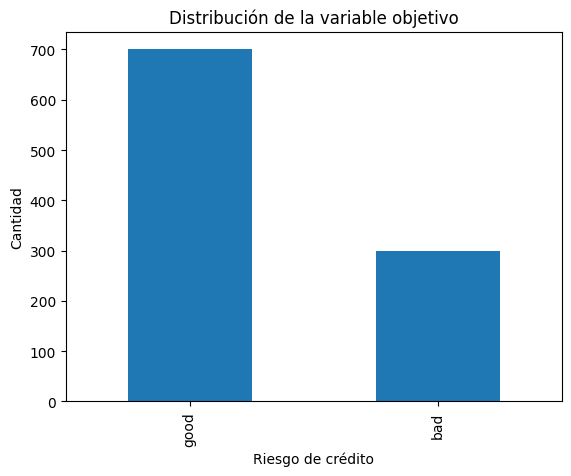

In [ ]:
# Distribución de la variable objetivo (Credit Risk)
df_cat['credit_risk'].value_counts().plot(kind='bar')
plt.title("Distribución de la variable objetivo")
plt.xlabel("Riesgo de crédito")
plt.ylabel("Cantidad")
plt.show()

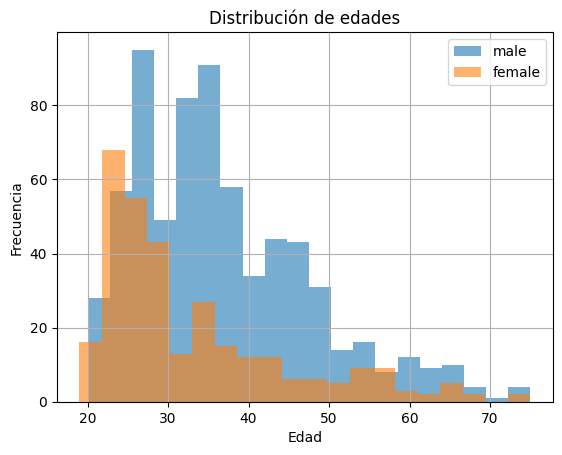

In [ ]:
# Distribución de edades
df_cat.query('gender == "male"')['age'].hist(bins=20, alpha = 0.6, label = 'male')
df_cat.query('gender == "female"')['age'].hist(bins=20, alpha = 0.6, label = 'female')
plt.title("Distribución de edades")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

In [ ]:
# Riesgo de crédito según género
equity_table = pd.crosstab(df_cat['credit_risk'], df_cat['gender'])
print("Tabla cruzada CreditRisk x Gender:\n", equity_table)
print("--"*10)
# Proporciones
equity_table_prop = pd.crosstab(df_cat['credit_risk'], df_cat['gender'], normalize='columns')
print("Proporciones de CreditRisk x Gender:\n", equity_table_prop)
print("--"*10)
# Tasa de aprobación de crédito por género
approval_rate = df_cat[df_cat['credit_risk']=='good'].groupby('gender').size() / df_cat.groupby('gender').size()
print("Tasa de aprobación de crédito por género:\n", approval_rate)

Tabla cruzada CreditRisk x Gender:
 gender       female  male
credit_risk              
bad             109   191
good            201   499
--------------------
Proporciones de CreditRisk x Gender:
 gender         female      male
credit_risk                    
bad          0.351613  0.276812
good         0.648387  0.723188
--------------------
Tasa de aprobación de crédito por género:
 gender
female    0.648387
male      0.723188
dtype: float64


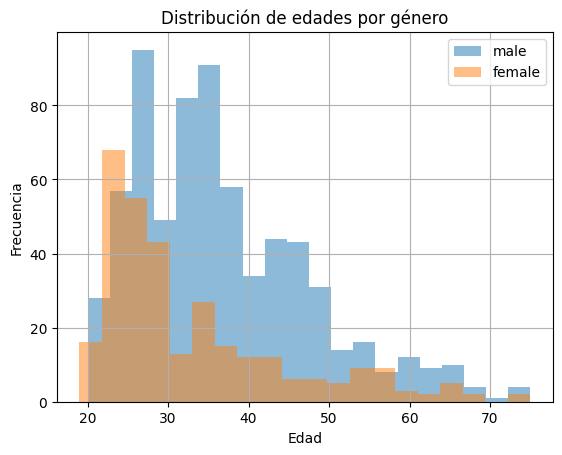

In [ ]:
# Distribución de edad según riesgo y género
df_cat[df_cat['gender']=='male']['age'].hist(bins=20, alpha=0.5, label='male')
df_cat[df_cat['gender']=='female']['age'].hist(bins=20, alpha=0.5, label='female')
plt.title("Distribución de edades por género")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.legend()
plt.show()

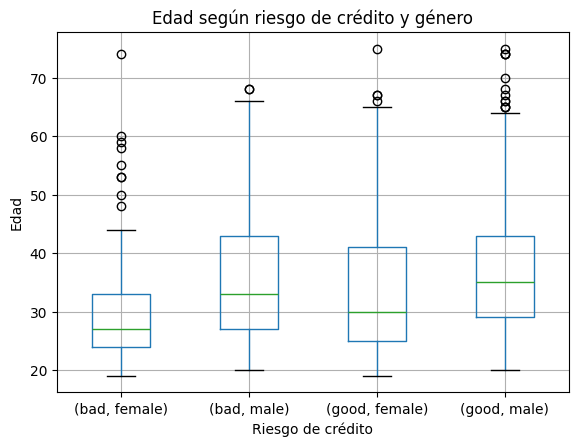

In [ ]:
# Boxplot
df_cat.boxplot(column='age', by=['credit_risk', 'gender'])
plt.title("Edad según riesgo de crédito y género")
plt.xlabel("Riesgo de crédito")
plt.ylabel("Edad")

plt.suptitle("")
plt.show()

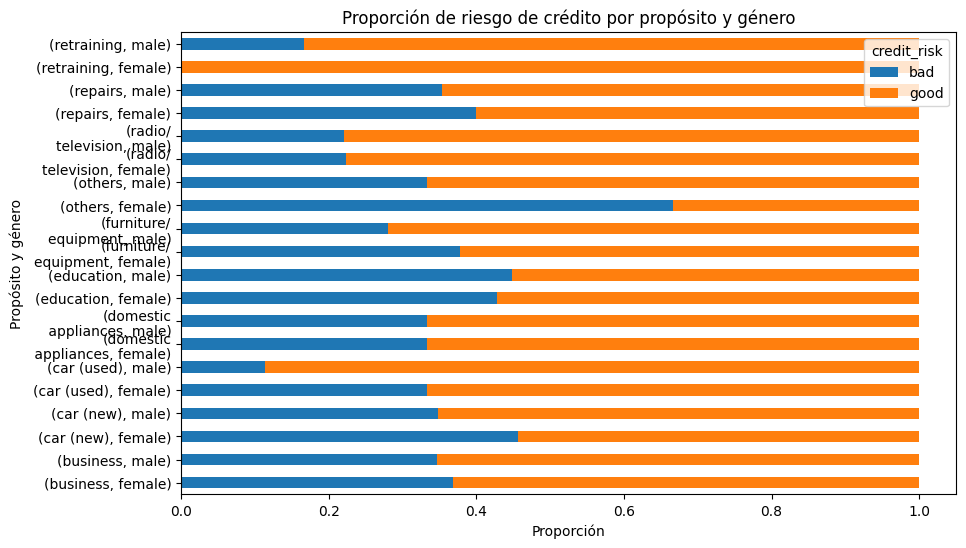

In [ ]:
# Riesgo de crédito según propósito y género
purpose_table = pd.crosstab([df_cat['purpose'], df_cat['gender']], df_cat['credit_risk'], normalize='index')
purpose_table.plot(kind='barh', stacked=True, figsize=(10,6))
plt.title("Proporción de riesgo de crédito por propósito y género")
plt.xlabel("Proporción")
plt.ylabel("Propósito y género")
plt.show()

# Creación Modelo inicial

In [ ]:
atributos_protegidos = ['gender'] #'personal_status' podría estar tambien, capaz hay correlacion con gender
target = 'credit_risk'
df = df_cat.copy()
X = df.drop(columns=[target])
y = df[target]
costos = {'good': 1, 'bad': 5} #está en la info del dataset

# Detectar variables categóricas y numéricas
categorical_cols = X.select_dtypes(include='object').columns.tolist()
numerical_cols = X.select_dtypes(exclude='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ],
    remainder="passthrough"
)

# Pipeline de Regresión Logística con matriz de costos
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=costos))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

=== MÉTRICAS GENERALES ===
              precision    recall  f1-score   support

         bad       0.43      0.90      0.58        60
        good       0.92      0.49      0.64       140

    accuracy                           0.61       200
   macro avg       0.68      0.70      0.61       200
weighted avg       0.77      0.61      0.62       200



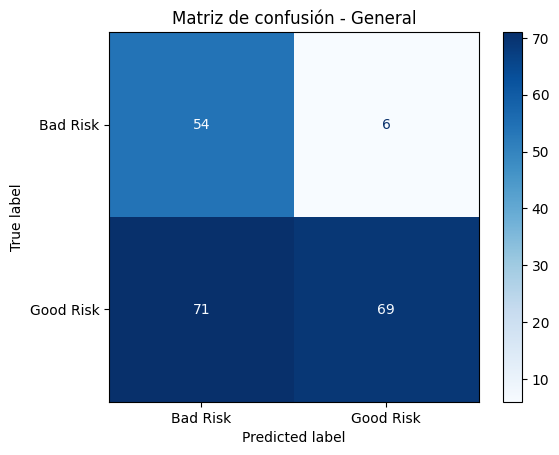

In [ ]:
print("=== MÉTRICAS GENERALES ===")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm, display_labels=["Bad Risk", "Good Risk"]).plot(cmap="Blues")
plt.title("Matriz de confusión - General")
plt.show()


**Comentarios generales del desempeño**

Al evaluar el desempeño del modelo de regresión logística entrenado sobre el dataset german.data, observamos que las métricas generales muestran un rendimiento a priori malo, pero alineado con el criterio establecido en la documentación en cuanto al peso de las predicciones erroneas. El documento dice textualmente "Es peor clasificar un cliente como bueno cuando en realidad es malo (falso positivo) que clasificar un cliente como malo cuando en realidad es bueno (falso negativo)". Por eso le asigna un peso de 5 al falso positivo y de 1 al falso negativo.

**Detalle de las métricas por clase**

Para la clase "good", el modelo tiene una precisión del 92% y un recall del 49%. Esto quiere decir que el 92% de los clientes que el modelo predice como buenos, realmente eran buenos pero, a su vez, sólo detectó al 49% de los buenos clientes de la muestra. El puntaje F1 de 0.64 (recordemos que es $2\frac{precission \times recall}{precission + recall}$) refleja el compromiso que toma el modelo en la ponderacion de falsos positivos y falsos negativos: sacrifica potenciales buenos clientes a cambio de no clasificar buenos como malos con una excelente precisión. El F1-score justamente penaliza este desequilibrio


Para la clase "bad", la precisión es de 43% mientras que el recall es de 90%. Esto indica que menos de la mitad de los clientes catalogados como malos realmente lo eran, pero aún así detectó al 90% de los malos clientes en la muestra. El puntaje F1 de 0.58 indica un desequilibrio incluso más alto entre ambas métricas respecto de la clase complementaria. La precisión es muy limitada y la toma de decisiones es más bien conservadora (ante la duda, el cliente es malo).

**Desempeño global**

Las el accuracy global es de de 0.61: el modelo clasificó correctamente el 61% de la muestra de evaluación. Esto es esperable dado el desbalanceo de las clases (good = 140, bad = 60) y que la matriz de costos propuesta busca minimizar la tasa de falsos positivos parala clase "good" a costa de pocos verdaderos positivos. Como los casos malos son significativamente menores que los buenos, es natural que el accuracy global sea relativamente bajo.

Respecto a las métricas ponderadas (weighted average) que son
precission = 0.77, recall = 0.61 y F1 = 0.62; considerando el desbalanceo de clases resulta lógico que los valores estén inclinados hacia los correspondientes a la clase "good".

**Comentarios finales de esta sección**

En términos generales, el modelo prioriza detectar correctamente a los malos clientes a costa de rechazar muchos buenos clientes.

Por último, es importante resaltar que el análisis global no refleja la equidad del modelo entre diferentes grupos demográficos, como mujeres y hombres. Ese desglose lo haremos a continuación.

Examinar las métricas por género permitirá identificar posibles sesgos y asegurar que las decisiones crediticias sean justas y equitativas para todos los clientes. Así, aunque las métricas generales son útiles, el desglose por grupo sigue siendo fundamental para una interpretación completa y responsable del modelo.


=== MÉTRICAS - MUJERES ===
              precision    recall  f1-score   support

         bad       0.42      0.85      0.57        20
        good       0.85      0.42      0.57        40

    accuracy                           0.57        60
   macro avg       0.64      0.64      0.57        60
weighted avg       0.71      0.57      0.57        60


=== MÉTRICAS - HOMBRES ===
              precision    recall  f1-score   support

         bad       0.44      0.93      0.59        40
        good       0.95      0.52      0.67       100

    accuracy                           0.64       140
   macro avg       0.69      0.72      0.63       140
weighted avg       0.80      0.64      0.65       140



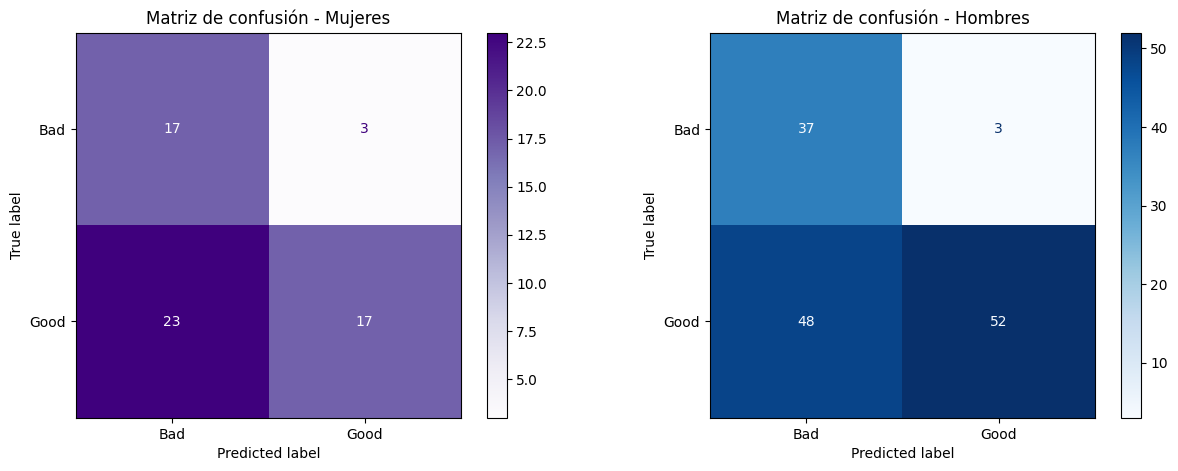

In [ ]:
X_test_copy = X_test.copy()
X_test_copy["y_true"] = y_test.values
X_test_copy["y_pred"] = y_pred

#máscaras
mask_female = X_test_copy["gender"] == 'female'
mask_male = X_test_copy["gender"] == 'male'

#prints
print("\n=== MÉTRICAS - MUJERES ===")
print(classification_report(X_test_copy.loc[mask_female, "y_true"],
                            X_test_copy.loc[mask_female, "y_pred"]))
print("\n=== MÉTRICAS - HOMBRES ===")
print(classification_report(X_test_copy.loc[mask_male, "y_true"],
                            X_test_copy.loc[mask_male, "y_pred"]))

# Matrices de confusión
cm_female = confusion_matrix(X_test_copy.loc[mask_female, "y_true"],
                             X_test_copy.loc[mask_female, "y_pred"])
cm_male = confusion_matrix(X_test_copy.loc[mask_male, "y_true"],
                           X_test_copy.loc[mask_male, "y_pred"])
#plots
f, axs = plt.subplots(nrows = 1, ncols = 2, sharex = False, figsize = (15, 5))
ConfusionMatrixDisplay(cm_female, display_labels=["Bad", "Good"]).plot(cmap="Purples", ax=axs[0])
axs[0].set_title("Matriz de confusión - Mujeres")
ConfusionMatrixDisplay(cm_male, display_labels=["Bad", "Good"]).plot(cmap="Blues",  ax=axs[1])
axs[1].set_title("Matriz de confusión - Hombres")
plt.show()

En el caso de las mujeres, el modelo tiene un accuracy de 0.57, con un recall de 0.42 para la clase “good” (quienes pagan) y 0.85 para la clase “bad” (quienes tienen alto riesgo). Esto muestra que el modelo es bastante más efectivo para detectar a las mujeres con mal riesgo que a las que pagarían correctamente. En otras palabras, muchas mujeres que en realidad pagarían son clasificadas como “malas”, lo que puede indicar que el modelo está siendo más exigente con este grupo y podría terminar perjudicándolas a la hora de aprobar un préstamo.

En el caso de los hombres, el modelo logra un accuracy de 0.64, con un recall de 0.52 para la clase “good” y 0.93 para la clase “bad”. Aunque el desempeño general es un poco mejor que en el grupo de mujeres, el patrón se repite: el modelo sigue detectando con más facilidad a los hombres con mal riesgo que a los buenos pagadores, aunque la diferencia entre clases es algo menor.

Desde la perspectiva del banco, el error más grave es marcar como “bad risk” a una persona que en realidad es buena pagadora (un falso negativo para la clase good). Por eso, los valores de recall para “good”, sobre todo el de las mujeres, muestran un punto importante a mejorar: el modelo está dejando pasar posibles buenas clientas.

En general, estas diferencias entre hombres y mujeres sugieren que puede haber un sesgo en el desempeño del modelo. Esto resalta la necesidad de revisar la equidad del modelo y, aplicar medidas para hacerlo más justo y evitar decisiones discriminatorias en las evaluaciones crediticias.

# Evaluación de Equidad del modelo inicial

**Statistical Parity (SP):**
Este criterio indica que la probabilidad de que un individuo reciba un préstamo aprobado debe ser la misma para todos los grupos, independientemente de su género. En otras palabras, un modelo cumple SP si la proporción de mujeres y hombres que reciben un crédito es aproximadamente igual. Si bien es un criterio intuitivo y fácil de calcular, en el contexto crediticio puede no ser suficiente, ya que no considera si los individuos realmente tienen capacidad de pago; es decir, podría priorizar la igualdad de acceso sin considerar el riesgo crediticio.

**Equal Opportunity:**
Este criterio se centra exclusivamente en los verdaderos positivos, es decir, aquellas personas que efectivamente pagarán el préstamo. Un modelo cumple Equal Opportunity si la probabilidad de aprobar un crédito para quienes efectivamente lo pagarán es la misma entre mujeres y hombres. Este criterio es especialmente relevante para el banco, ya que maximizar la aprobación entre clientes solventes es coherente con su objetivo de rentabilidad y seguridad financiera.

Equalized Odds (EOdds):
Este criterio amplía Equal Opportunity considerando tanto los verdaderos positivos como los falsos positivos. Para que se cumpla Equalized Odds, la probabilidad de aprobar un crédito debe ser la misma entre géneros tanto para quienes efectivamente pagarán como para quienes no pagarán. Este criterio es más estricto, ya que controla la equidad en ambos tipos de error, y puede ser útil para reducir discriminación en los falsos positivos (aprobar créditos a personas que no los pagarán) y falsos negativos (rechazar créditos a quienes sí pagarían).

**Predictive Parity (PP):**
Este criterio se enfoca en la precisión del modelo. Un modelo cumple Predictive Parity si, dado que se aprueba un crédito, la probabilidad de que efectivamente se pague es la misma entre mujeres y hombres. Esto asegura que las decisiones de aprobación sean igualmente confiables para todos los grupos.

In [ ]:
# Definir las columnas

target = "credit_risk"
protected = "gender"
features = [f for f in df.columns.tolist() if (f!=target and f!=protected)]

# Crear X, y numerico (reweigh necesita valores numéricos)
X = df[features]
# y_numeric = df[target].replace({"good": 1, "bad": 0})
y = df[target]
group_a = df[protected] == "female"
group_b = df[protected] == "male"
# Crear el objeto Dataset
data = Dataset(X=X, y=y, p_attr= df[protected], group_a = group_a, group_b = group_b)

# Chequeo que sea del tipo
print(data.data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   (X, status)                    1000 non-null   object
 1   (X, duration_in_months)        1000 non-null   int64 
 2   (X, credit_history)            1000 non-null   object
 3   (X, purpose)                   1000 non-null   object
 4   (X, credit_amount)             1000 non-null   int64 
 5   (X, savings_account/bonds)     1000 non-null   object
 6   (X, present_employment_since)  1000 non-null   object
 7   (X, installment_rate)          1000 non-null   int64 
 8   (X, other_debtors)             1000 non-null   object
 9   (X, present_residence_since)   1000 non-null   int64 
 10  (X, property)                  1000 non-null   object
 11  (X, age)                       1000 non-null   int64 
 12  (X, other_installment_plans)   1000 non-null   object
 13  (X, 

In [ ]:
# Train test split
tt_split = data.train_test_split(test_size=0.2, random_state=42, stratify=y)
train = tt_split['train']
test = tt_split['test']

# check the number of samples in each group
print('Train data shape:', train['X'].shape)
print('Test data shape:', test['X'].shape)


Train data shape: (800, 20)
Test data shape: (200, 20)


In [ ]:
tt_plit = train_test_split(df, test_size=0.2, random_state=42, stratify=y)
test_group_a = np.array(tt_split['test']['group_a'])
test_group_b = np.array(tt_split['test']['group_b'])
y_pred_bin = np.array(y_pred=="good")
y_true_bin = np.array(tt_split['test']['y'] == 'good')

baseline = classification_bias_metrics(test_group_a, test_group_b, y_pred_bin, y_true_bin, metric_type='both')
baseline_accuracy = accuracy_score(y_test,y_pred)
# umbral de disparidad
threshold = 0.05

# baseline es un diccionario con las métricas; lo paso a pd.
baseline_df = pd.DataFrame(baseline).T

# Seleccionar métricas que tengan 'difference' en el nombre
diff_cols = [col for col in baseline_df.columns if 'difference' in col.lower()]

# Mapear métricas normalizadas a criterios de fairness
metric_to_criterion = {
    'statistical_parity_difference': 'Statistical Parity (SP)',
    'equalized_odds_difference': 'Equalized Odds (EO)',
    'equal_opportunity_difference': 'Equal Opportunity (EOp)',
    'predictive_parity_difference': 'Predictive Parity (PP)'
}

# Crear tabla de resultados
results = []

for col in diff_cols:
    # Normalizar nombre de la métrica
    col_norm = col.lower().replace(' ', '_')

    diff_value = abs(baseline_df[col].values[0])  # valor absoluto
    fair = ' Fair' if diff_value <= threshold else ' Not Fair'

    # Obtener el nombre legible del criterio
    criterio = metric_to_criterion.get(col_norm, col)

    results.append({
        'Criterio': criterio,
        'Disparidad Absoluta': round(diff_value, 4),
        'Umbral': threshold,
        'Cumple Fairness': fair
    })

fairness_table = pd.DataFrame(results)

# Mostrar tabla ordenada por disparidad
fairness_table.sort_values(by='Disparidad Absoluta', ascending=False)


,Criterio,Disparidad Absoluta,Umbral,Cumple Fairness
0,Equality of Opportunity Difference,0.095,0.05,Not Fair
1,False Positive Rate Difference,0.075,0.05,Not Fair
3,Accuracy Difference,0.069,0.05,Not Fair
2,Average Odds Difference,0.010,0.05,Fair


Desde la perspectiva de un banco que busca maximizar la cantidad de clientes que efectivamente pagarán su crédito, el criterio más relevante es **Equal Opportunity**. Esto se debe a que garantiza que todas las personas con buen riesgo tengan la misma probabilidad de recibir un préstamo, independientemente de su género.

Otros criterios, como Statistical Parity o Predictive Parity, son menos críticos en este contexto, ya que podrían priorizar la igualdad de acceso o la precisión sin considerar si las personas realmente pagarán los créditos, lo que podría ser contraproducente para el objetivo central del banco.

Por tanto, sería recomendable aplicar técnicas de ajuste de fairness, como reweighting, en un modelo posterior para reducir esta disparidad y garantizar decisiones más equitativas entre mujeres y hombres, sin afectar significativamente la rentabilidad.

# Mitigación de sesgos

a) Seleccionar al menos 2 técnicas de Mitigación de sesgos vistas en clase, entrenar el modelo ajustado y evaluar su performance usando las métricas clásicas (precision, recall, accuracy, f1-score) y crear la matriz de confusión. Interpretar los resultados obtenidos hasta el momento.

b)Evaluar su performance utilizando las mismas métricas y evaluaciones de equidad del inciso 3.


Lo que primero quiero hacer es ver el dataset de holistic, porque está más claro pero las metricas dan distintas


## Reweighting

Creacion del modelo

In [ ]:
# Detectar variables categóricas y numéricas
categorical_cols = data.data['X'].select_dtypes(include='object').columns.tolist()
numerical_cols = data.data['X'].select_dtypes(exclude='object').columns.tolist()
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), categorical_cols),
        ("num", StandardScaler(), numerical_cols)
    ],
    remainder="passthrough"
)

# Pipeline de Regresión Logística con matriz de costos
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=costos))
])

model.fit(tt_split['train']['X'], tt_split['train']['y'])
y_pred = model.predict(tt_split['test']['X'])



In [ ]:
from holisticai.bias.mitigation import Reweighing
rw = Reweighing()

pipeline_rw = Pipeline(steps=[
    ("preprocessor", preprocessor),
     ("bm_preprocessing", rw),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=costos))
])
pipeline_rw.fit(tt_split['train']['X'], tt_split['train']['y'], bm__group_a=tt_split['train']['group_a'], bm__group_b=tt_split['train']['group_b'])

In [ ]:
y_pred_rw = pipeline_rw.predict(
                                tt_split['test']['X'],
                                bm__group_a=tt_split['test']['group_a'],
                                bm__group_b=tt_split['test']['group_b']
                                )
y_pred_rw_bin = np.array(y_pred_rw=="good")
# Evaluate bias metrics for pipeline model
metrics_preprocessing_reweighting = classification_bias_metrics(
                                                                tt_split['test']['group_a'],
                                                                tt_split['test']['group_b'],
                                                                y_pred_rw_bin,
                                                                y_true_bin,
                                                                metric_type='both'
                                                                )

# Compute accuracy for preprocessing model
accuracy_preprocessing_reweighting = accuracy_score(tt_split['test']['y'], y_pred_rw)

### Evaluación de métricas

=== MÉTRICAS GENERALES - REWEIGHING ===
              precision    recall  f1-score   support

         bad     0.4463    0.9000    0.5967        60
        good     0.9241    0.5214    0.6667       140

    accuracy                         0.6350       200
   macro avg     0.6852    0.7107    0.6317       200
weighted avg     0.7807    0.6350    0.6457       200



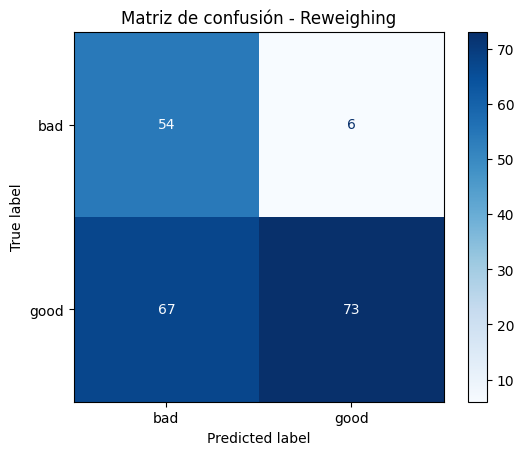

Accuracy (Reweighing): 0.6350


In [ ]:
print("=== MÉTRICAS GENERALES - REWEIGHTING ===")
print(classification_report(tt_split['test']['y'], y_pred_rw, digits=4))

# Matriz de confusión (etiquetas automáticas según tus clases en test)
cm = confusion_matrix(tt_split['test']['y'], y_pred_rw, labels=np.unique(tt_split['test']['y']))
ConfusionMatrixDisplay(cm, display_labels=np.unique(tt_split['test']['y'])).plot(cmap="Blues")
plt.title("Matriz de confusión - Reweighing")
plt.show()

# Accuracy
acc = accuracy_score(tt_split['test']['y'], y_pred_rw)
print(f"Accuracy (Reweighing): {acc:.4f}")

Tras aplicar la técnica de reweighting, el modelo mantuvo un desempeño general muy similar al modelo base, con una accuracy global de 0.635, lo que indica que clasifica correctamente aproximadamente dos tercios de los casos del conjunto de prueba. Sin embargo, más allá del valor absoluto de la precisión global, lo más relevante es observar cómo se modificaron las métricas por clase en función del objetivo institucional del banco.

Para la clase “good” (clientes solventes), la precisión fue de 0.92, lo que significa que, cuando el modelo aprueba un crédito, casi todas las personas efectivamente pueden pagarlo. Este comportamiento es deseable, ya que evita pérdidas financieras directas por préstamos otorgados a clientes de alto riesgo.
Por otro lado, el recall aumentó levemente a 0.52, lo que implica que ahora el modelo identifica correctamente al 52 % de los buenos clientes (frente al 49 % del modelo inicial).
Esa mejora, aunque modesta, representa un avance importante: el modelo se vuelve más capaz de reconocer oportunidades de negocio sin incrementar en exceso los riesgos.

In [ ]:
# (Asumo que ya importaste antes: pandas as pd, numpy as np,
#  y que existe la función classification_bias_metrics)

# Parámetros
positive_label = "good"   # cambiar si tu positivo no es "good"
threshold = 0.05

# preparar etiquetas binarias
y_pred_rw_bin = np.array(y_pred_rw == positive_label)
y_true_bin = np.array(tt_split['test']['y'] == positive_label)

# calcular métricas de bias (usa tus group_a / group_b del test)
raw_metrics = classification_bias_metrics(
    tt_split['test']['group_a'],
    tt_split['test']['group_b'],
    y_pred_rw_bin,
    y_true_bin,
    metric_type='both'
)

# pasar a DataFrame (cada métrica en fila)
rw_df = pd.DataFrame(raw_metrics).T

# seleccionar columnas de 'difference' (tolerante a variaciones)
diff_cols = [c for c in rw_df.columns if ('difference' in c.lower()) or ('diff' in c.lower())]

# mapping parcial a nombre legible (ajustalo si querés)
metric_map = {
    'statistical_parity': 'Statistical Parity (SP)',
    'equalized_odds': 'Equalized Odds (EO)',
    'equal_opportunity': 'Equal Opportunity (EOp)',
    'predictive_parity': 'Predictive Parity (PP)'
}

# construir tabla legible
rows = []
for col in diff_cols:
    key = col.lower()
    # intento de mapeo por substring
    criterio = next((v for k,v in metric_map.items() if k in key), col)
    try:
        val = abs(float(rw_df[col].iloc[0]))
    except Exception:
        val = np.nan
    cumple = 'Fair' if (not pd.isna(val) and val <= threshold) else 'Not Fair'
    rows.append({
        'Criterio': criterio,
        'Disparidad Absoluta': round(val, 4) if not pd.isna(val) else np.nan,
        'Umbral': threshold,
        'Cumple Fairness': cumple
    })

fairness_table_rw = pd.DataFrame(rows).sort_values(by='Disparidad Absoluta', ascending=False).reset_index(drop=True)

# Mostrar / guardar
display(fairness_table_rw)   # Jupyter
# print(fairness_table_rw)   # script normal
# fairness_table_rw.to_csv("fairness_table_reweighing.csv", index=False)


,Criterio,Disparidad Absoluta,Umbral,Cumple Fairness
0,False Positive Rate Difference,0.1500,0.05,Not Fair
1,Average Odds Difference,0.0950,0.05,Not Fair
2,Equality of Opportunity Difference,0.0400,0.05,Fair
3,Accuracy Difference,0.0024,0.05,Fair


Después de aplicar reweighting, se observa una mejora significativa en la equidad del modelo, especialmente en cómo trata a hombres y mujeres al momento de decidir quiénes representan un buen perfil crediticio.

La métrica más relevante para el objetivo del banco es la Equality of Opportunity Difference, que mide si ambos grupos tienen la misma probabilidad de ser clasificados correctamente como buenos pagadores cuando realmente lo son. En este caso, la mejora es clara: pasa de 0.13 en el baseline a 0.04 después del reweighting. Esto significa que el modelo ahora ofrece una oportunidad mucho más equitativa para que tanto hombres como mujeres con buen historial crediticio sean reconocidos correctamente.

Este cambio es especialmente importante desde la perspectiva del banco, ya que reducir la diferencia en igualdad de oportunidad implica minimizar el riesgo de rechazar clientes solventes solo por pertenecer a un grupo determinado. Es decir, el modelo mejora su capacidad de detectar buenos pagadores sin introducir sesgos de género, lo que beneficia tanto la precisión del negocio como la justicia en la decisión crediticia.

Aunque algunas métricas, como la False Positive Rate Difference, aumentan ligeramente (de 0.07 a 0.15), el impacto general es positivo: la Accuracy Difference se reduce casi a cero (de 0.09 a 0.002), lo que muestra que el desempeño del modelo es muy similar entre géneros.

En conjunto, el reweighting logró mejorar sustancialmente la igualdad de oportunidades sin comprometer la efectividad del modelo, alineándose con el objetivo del banco de maximizar la identificación de buenos clientes y garantizar decisiones justas y equilibradas entre hombres y mujeres.

## Correlation Remover

### Análisis de correlación

In [ ]:
# data.data.corr() no funciona, aplicar el onehot encoding y standard scaler
#  (que están en el preprocessor que se usó en el primer pipeline)
# debería correr ok
preprocessor.fit(data.data['X'])
df_encoded = preprocessor.transform(data.data['X'])
# Get the feature names after transformation
feature_names = preprocessor.get_feature_names_out()


df_encoded = pd.DataFrame(df_encoded, columns=feature_names)


df_encoded['group_a'] = data.data['group_a'].values
df_encoded['group_b'] = data.data['group_b'].values
df_encoded['y'] = data.data['y']['y'].values
df_encoded['y_numeric'] = df_encoded['y'].map({'good': 1, 'bad': 0})

df_encoded = df_encoded.drop(columns=['y'])

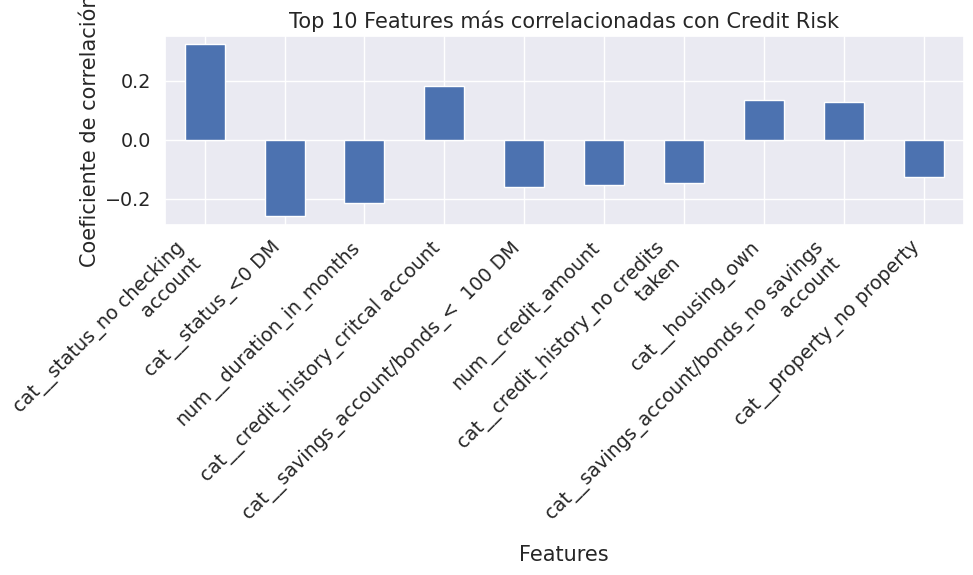

In [ ]:
# Get correlations with the target variable 'y_numeric'
correlation_matrix = df_encoded.corr()
correlations_with_target = correlation_matrix['y_numeric'].sort_values(ascending=False)

# Drop the correlation of the target with itself
correlations_with_target = correlations_with_target.drop('y_numeric')

# Select the top 10 most correlated features by absolute value
top_10_correlated_features = correlations_with_target.abs().sort_values(ascending=False).head(10).index

# Filter the original correlations to get the values for the top 10 features
top_10_correlations_values = correlations_with_target[top_10_correlated_features]

# Create a bar plot
plt.figure(figsize=(10, 6))
top_10_correlations_values.plot(kind='bar')
plt.title('Top 10 Features más correlacionadas con Credit Risk')
plt.xlabel('Features')
plt.ylabel('Coeficiente de correlación')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Axes: title={'center': 'Correlation matrix'}>

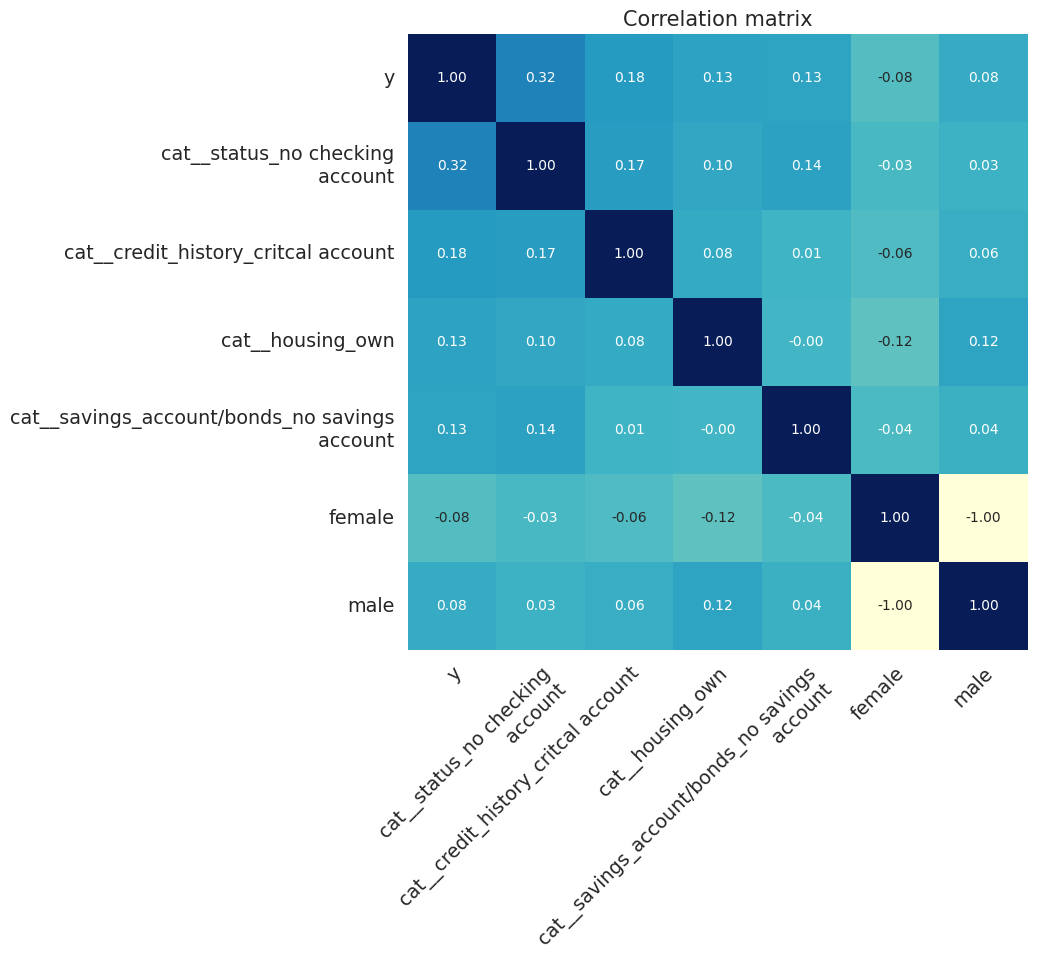

In [ ]:
from holisticai.datasets.plots import correlation_matrix_plot
# data = Dataset(X=X, y=y, p_attr= df[protected], group_a = group_a, group_b = group_b)
features = [c for c in list(df_encoded.columns) if c not in ['group_a', 'group_b','y_numeric']]
data_encoded = Dataset(X = df_encoded[features], y = df_encoded['y_numeric'], female =df_encoded['group_a'], male =df_encoded['group_b'] )
correlation_matrix_plot(data_encoded, features = ['X'],   fixed_features = ['female', 'male'], target_feature='y',size=(8, 8), n_features=5)

### Creación del modelo

In [ ]:
# Define pipeline
from holisticai.bias.mitigation import CorrelationRemover
mitigator = CorrelationRemover()

x_train = tt_split['train']['X']
y_train = tt_split['train']['y']
group_a_train = tt_split['train']['group_a']
group_b_train = tt_split['train']['group_b']

pipeline_cr = Pipeline(steps=[
    ("preprocessor", preprocessor),
     ("bm_preprocessing", mitigator),
    ("classifier", LogisticRegression(max_iter=1000, class_weight=costos))
])
pipeline_cr.fit(x_train,
                y_train,
                bm__group_a=group_a_train,
                bm__group_b=group_b_train
                )

# Make predictions
y_pred_cr = pipeline_cr.predict(tt_split['test']['X'],
                                bm__group_a=tt_split['test']['group_a'],
                                bm__group_b=tt_split['test']['group_b']
                                )

y_pred_cr_bin = np.array(y_pred_cr=="good")
# Evaluate bias metrics for pipeline model
metrics_preprocessing_correlationRemover = classification_bias_metrics(
                                          tt_split['test']['group_a'],
                                          tt_split['test']['group_b'],
                                          y_pred_cr_bin,
                                          y_true_bin,
                                          metric_type='both'
                                          )

# Compute accuracy for preprocessing model
accuracy_preprocessing_correlationRemover = accuracy_score(tt_split['test']['y'], y_pred_cr)

### Evaluación métricas

=== MÉTRICAS GENERALES - REWEIGHTING ===
              precision    recall  f1-score   support

         bad     0.4500    0.9000    0.6000        60
        good     0.9250    0.5286    0.6727       140

    accuracy                         0.6400       200
   macro avg     0.6875    0.7143    0.6364       200
weighted avg     0.7825    0.6400    0.6509       200



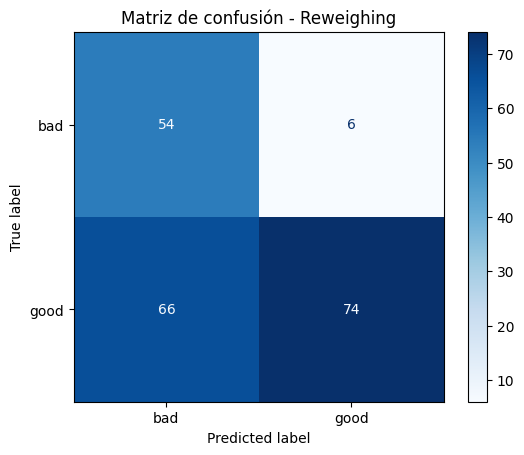

Accuracy (Reweighing): 0.6400


In [ ]:
print("=== MÉTRICAS GENERALES - CORRELATION REMOVER ===")
print(classification_report(tt_split['test']['y'], y_pred_cr, digits=4))

# Matriz de confusión (etiquetas automáticas según tus clases en test)
cm = confusion_matrix(tt_split['test']['y'], y_pred_cr, labels=np.unique(tt_split['test']['y']))
ConfusionMatrixDisplay(cm, display_labels=np.unique(tt_split['test']['y'])).plot(cmap="Blues")
plt.title("Matriz de confusión - Reweighing")
plt.show()

# Accuracy
acc = accuracy_score(tt_split['test']['y'], y_pred_cr)
print(f"Accuracy (Correlation Remover): {acc:.4f}")

Luego de aplicar la técnica de Correlation Remover, el modelo alcanzó una accuracy global de 0.64, mostrando una leve mejora respecto del modelo inicial. Este incremento, aunque moderado, resulta relevante en el contexto crediticio, donde pequeños aumentos en la capacidad de identificar correctamente a los solicitantes pueden traducirse en un impacto económico significativo.

En la clase “good” (clientes con buen riesgo crediticio), la precisión se mantiene muy alta (0.93), lo que significa que, cuando el modelo decide aprobar un crédito, en la gran mayoría de los casos se trata efectivamente de personas que cumplen con sus pagos. Esto continúa garantizando una gestión prudente del riesgo financiero.
Al mismo tiempo, el recall mejoró hasta 0.53, indicando que ahora el modelo logra identificar correctamente a más de la mitad de los buenos clientes, superando el 49 % obtenido antes de la mitigación.
Este avance es especialmente valioso desde la perspectiva del banco, ya que implica una mayor cantidad de créditos otorgados a clientes solventes, lo que incrementa el volumen de negocio sin aumentar de forma significativa la exposición al incumplimiento.

In [ ]:
positive_label = "good"
threshold = 0.05

y_pred_cr_bin = np.array(y_pred_cr == positive_label)
y_true_bin = np.array(tt_split['test']['y'] == positive_label)

raw_metrics_cr = classification_bias_metrics(
    tt_split['test']['group_a'],
    tt_split['test']['group_b'],
    y_pred_cr_bin,
    y_true_bin,
    metric_type='both'
)

cr_df = pd.DataFrame(raw_metrics_cr).T

diff_cols = [c for c in cr_df.columns if ('difference' in c.lower()) or ('diff' in c.lower())]

metric_map = {
    'statistical_parity': 'Statistical Parity (SP)',
    'equalized_odds': 'Equalized Odds (EO)',
    'equal_opportunity': 'Equal Opportunity (EOp)',
    'predictive_parity': 'Predictive Parity (PP)'
}

rows = []
for col in diff_cols:
    key = col.lower()
    criterio = next((v for k,v in metric_map.items() if k in key), col)
    try:
        val = abs(float(cr_df[col].iloc[0]))
    except Exception:
        val = np.nan
    cumple = 'Fair' if (not pd.isna(val) and val <= threshold) else 'Not Fair'
    rows.append({
        'Criterio': criterio,
        'Disparidad Absoluta': round(val, 4) if not pd.isna(val) else np.nan,
        'Umbral': threshold,
        'Cumple Fairness': cumple
    })

fairness_table_cr = pd.DataFrame(rows).sort_values(by='Disparidad Absoluta', ascending=False).reset_index(drop=True)

display(fairness_table_cr)



,Criterio,Disparidad Absoluta,Umbral,Cumple Fairness
0,False Positive Rate Difference,0.1500,0.05,Not Fair
1,Average Odds Difference,0.1075,0.05,Not Fair
2,Equality of Opportunity Difference,0.0650,0.05,Not Fair
3,Accuracy Difference,0.0143,0.05,Fair


Después de aplicar CorrelationRemover, el modelo mantiene un desempeño general consistente entre grupos, pero todavía muestra sesgos importantes.

La métrica clave, Equality of Opportunity Difference, es 0.065, por encima del umbral de 0.05, indicando que algunos buenos clientes podrían ser rechazados solo por pertenecer a un grupo específico. La Average Odds Difference y la False Positive Rate Difference confirman estas desigualdades.

La Accuracy Difference es baja, mostrando que el desempeño global es similar entre grupos, pero esto no elimina las diferencias críticas en decisiones de crédito.

En resumen, CorrelationRemover mantiene la efectividad del modelo, pero la igualdad de oportunidades aún no se alcanza plenamente, por lo que podrían considerarse ajustes adicionales para reducir los sesgos en decisiones crediticias.

# Comparación de modelos

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Lista de modelos y sus predicciones
models = {
    "Baseline": y_pred,
    "Reweighing": y_pred_rw,
    "CorrelationRemover": y_pred_cr
}

# Crear lista para almacenar cada fila
rows = []

for name, preds in models.items():
    rows.append({
        "Modelo": name,
        "Precision (good)": precision_score(y_test, preds, pos_label="good"),
        "Recall (good)": recall_score(y_test, preds, pos_label="good"),
        "F1-score (good)": f1_score(y_test, preds, pos_label="good"),
        "Accuracy": accuracy_score(y_test, preds)
    })

# Crear DataFrame
comparison_table = pd.DataFrame(rows)

# Mostrar tabla redondeada
display(comparison_table.round(3))


,Modelo,Precision (good),Recall (good),F1-score (good),Accuracy
0,Baseline,0.920,0.493,0.642,0.615
1,Reweighing,0.924,0.521,0.667,0.635
2,CorrelationRemover,0.925,0.529,0.673,0.640


Al analizar los tres modelos, se observa una diferencia clara en su desempeño sobre la clase de interés (good). El baseline tiene una precision alta (0.92), lo que indica que cuando predice un buen cliente generalmente acierta, pero su recall es bajo (0.493), lo que significa que muchos clientes solventes no son detectados. Esto se refleja en un F1-score de 0.642 y una accuracy general de 0.615.

Al aplicar reweighing, se mejora el recall a 0.521 y el F1-score sube a 0.667, mientras que la accuracy general aumenta a 0.635. Esto muestra que el modelo ahora identifica más correctamente a buenos clientes, reduciendo el riesgo de rechazos injustos, sin sacrificar la precisión.

El modelo con CorrelationRemover obtiene los mejores resultados: recall de 0.529, F1-score de 0.673 y accuracy de 0.640, manteniendo la alta precision de 0.925. Esto indica que, además de mantener la confiabilidad al predecir buenos clientes, logra capturar aún más casos positivos, equilibrando efectividad y justicia.

En resumen, aunque ambos métodos de mitigación mejoran al baseline, CorrelationRemover es el más equilibrado, pues aumenta la detección de buenos clientes y mejora la exactitud general, lo que resulta en decisiones crediticias más justas y efectivas.

In [ ]:
keys = ['Baseline', 'Preprocessing Mitigator Reweighting',
        'Preprocessing Mitigator Correlation Remover', 'Reference']
comparison = pd.concat([baseline['Value'],
                        metrics_preprocessing_reweighting['Value'],
                        metrics_preprocessing_correlationRemover['Value'],
                        metrics_preprocessing_correlationRemover.Reference
                        ], axis=1)
comparison.columns = keys

def highlight_closest(s):
    reference = s['Reference']
    differences = s.drop('Reference').apply(lambda x: abs(x - reference))
    closest = differences.idxmin()
    return ['background-color: mediumseagreen' if x == s[closest] else '' for x in s]

comparison_highlighted = comparison.style.apply(highlight_closest, axis=1)
comparison_highlighted

,Baseline,Preprocessing Mitigator Reweighting,Preprocessing Mitigator Correlation Remover,Reference
Metric,,,,
Statistical Parity,-0.059524,0.054762,0.071429,0
Disparate Impact,0.848485,1.144654,1.188679,1
Four Fifths Rule,0.848485,0.873626,0.841270,1
Cohen D,-0.123139,0.112175,0.146137,0
2SD Rule,-0.796819,0.725984,0.944911,0
Equality of Opportunity Difference,-0.095000,0.040000,0.065000,0
False Positive Rate Difference,0.075000,0.150000,0.150000,0
Average Odds Difference,-0.010000,0.095000,0.107500,0
Accuracy Difference,-0.069048,-0.002381,0.014286,0


Al analizar las métricas de fairness para los tres modelos, se observa un contraste claro en cómo tratan a los clientes según su grupo protegido.

El baseline muestra una Equality of Opportunity Difference de -0.095, lo que significa que un grupo de buenos clientes es sistemáticamente menos reconocido como tal. Esto representa un riesgo importante para el banco, ya que clientes solventes podrían ser rechazados injustamente, afectando tanto la rentabilidad como la equidad en las decisiones de crédito. Otras métricas, como Disparate Impact y Accuracy Difference, también reflejan desequilibrio entre grupos.

Con Reweighing, la Equality of Opportunity Difference mejora significativamente a 0.04, dentro del umbral de fairness aceptable. Esto indica que ahora ambos grupos tienen prácticamente la misma probabilidad de ser identificados correctamente como buenos pagadores. Además, la diferencia de accuracy se reduce casi a cero, mostrando que el desempeño del modelo es equitativo entre grupos, aunque la False Positive Rate aumenta ligeramente para un grupo, lo que puede ser monitoreado. En términos del negocio, esto implica que el banco puede detectar más clientes solventes de manera justa, reduciendo el riesgo de discriminación y mejorando la eficiencia en la aprobación de créditos.

El CorrelationRemover también mejora la situación respecto al baseline, pero la Equality of Opportunity Difference se mantiene en 0.065, ligeramente por encima del umbral. Aunque la precisión global y otras métricas son comparables, todavía existe un pequeño sesgo en la probabilidad de que buenos clientes sean reconocidos, lo que podría traducirse en decisiones de crédito menos equitativas que con Reweighing.

En resumen, Reweighing es la opción más alineada con los objetivos del banco, ya que maximiza la igualdad de oportunidades para que clientes solventes sean correctamente identificados como buenos pagadores, manteniendo un desempeño equilibrado y reduciendo riesgos de discriminación. CorrelationRemover mejora la situación respecto al baseline, pero no alcanza el mismo nivel de equidad en la métrica crítica de Equality of Opportunity.

# Conclusiones finales

Después de analizar el desempeño y las métricas de fairness de los tres modelos, elegimos el modelo con Reweighing como la mejor opción para el banco. Este modelo logra un equilibrio entre precisión y equidad de género, manteniendo la Equality of Opportunity Difference dentro del umbral aceptable (0.04). Esto significa que hombres y mujeres solventes tienen prácticamente la misma probabilidad de ser reconocidos como buenos pagadores, minimizando el riesgo de rechazar injustamente a personas por su género.

Aunque el modelo no es perfecto y aún deja un pequeño porcentaje de buenos clientes sin detectar, es significativamente mejor que el baseline y más confiable que CorrelationRemover en términos de igualdad de oportunidades entre géneros. Desde nuestra perspectiva, representa un buen compromiso entre eficiencia del negocio y decisiones justas.

Estos resultados muestran cómo las técnicas de mitigación de sesgo impactan directamente la toma de decisiones automatizadas en contextos sensibles como el crédito bancario. Garantizar equidad de género no solo reduce riesgos regulatorios y reputacionales, sino que también aumenta la confianza de los clientes en el sistema.

La equidad en machine learning no es solo un objetivo ético, sino un requerimiento práctico: permite que los modelos sean robustos, responsables y sostenibles. Ignorar este aspecto puede llevar a decisiones discriminatorias que afectan a las personas y la reputación de la institución. Por eso, integrar métricas de fairness y técnicas de mitigación en nuestros pipelines es esencial para construir modelos que funcionen bien y de manera justa para todos los géneros en el mundo real.